In [1]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics\\Basics')

In [2]:
import pandas as pd
from ShotData import shot_data
from Data.Understat_Data import scrape_match_shots
from mplsoccer import Pitch
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from Pitch.My_Pitch import myPitch

# Get and handle data

In [3]:
sd = scrape_match_shots(23092)

shotdata = shot_data(sd, data_source='Understat')
print(shotdata)

shot_data object of Understat of shape (29, 7).


In [4]:
shotdata.data

x          y        xG  minute              team  \
0   117.360004  28.400000  0.061222       1     Bayern Munich   
1   106.200000  50.479999  0.089346       2     Bayern Munich   
2   117.239996  35.760001  0.448874       6     Bayern Munich   
3    99.119998  37.760001  0.074437      10     Bayern Munich   
4   108.719998  44.079999  0.035626      34     Bayern Munich   
5   113.160004  50.320001  0.087362      34     Bayern Munich   
6    93.600000  40.239999  0.033529      42     Bayern Munich   
7   104.519998  35.839999  0.072835      42     Bayern Munich   
8   110.039996  34.160001  0.100616      43     Bayern Munich   
9   112.919998  24.159998  0.298206      44     Bayern Munich   
10   94.439996  34.639999  0.025044      45     Bayern Munich   
11  111.719998  43.120001  0.329252      45     Bayern Munich   
12   90.600000  51.439999  0.014844      51     Bayern Munich   
13  110.160004  37.760001  0.491690      56     Bayern Munich   
14  110.400000  45.200000  0.075253      65     Bayern Munich   
15  110.280002  40.320001  0.508713      85     Bayern Munich   
16   15.000000  49.120001  0.067680      22  Bayer Leverkusen   
17   27.360004  35.120001  0.086198      23  Bayer Leverkusen   
18    3.600000  48.639999  0.122304      30  Bayer Leverkusen   
19   33.119998  53.840002  0.015840      31  Bayer Leverkusen   
20   10.080002  52.079999  0.090352      31  Bayer Leverkusen   
21   15.239996  46.639999  0.128769      39  Bayer Leverkusen   
22   60.000000  26.079999  0.009916      50  Bayer Leverkusen   
23    9.600000  49.279999  0.336147      77  Bayer Leverkusen   
24    6.719998  51.279999  0.310085      79  Bayer Leverkusen   
25   22.200000  53.279999  0.032324      80  Bayer Leverkusen   
26   18.839996  41.520001  0.082730      84  Bayer Leverkusen   
27   13.800000  42.960001  0.418277      87  Bayer Leverkusen   
28   13.800000  40.000000  0.757777      93  Bayer Leverkusen   

                      player       result  
0               Serge Gnabry  MissedShots  
1              Konrad Laimer    SavedShot  
2                 Harry Kane         Goal  
3                 Leroy Sané  MissedShots  
4              Thomas Müller    SavedShot  
5               Serge Gnabry  BlockedShot  
6                 Leroy Sané    SavedShot  
7                Kim Min-Jae  BlockedShot  
8              Leon Goretzka    SavedShot  
9               Serge Gnabry    SavedShot  
10             Konrad Laimer  BlockedShot  
11              Serge Gnabry  MissedShots  
12            Joshua Kimmich    SavedShot  
13                Harry Kane    SavedShot  
14  Dayotchanculle Upamecano  MissedShots  
15             Leon Goretzka         Goal  
16           Victor Boniface  BlockedShot  
17             Álex Grimaldo         Goal  
18           Victor Boniface    SavedShot  
19              Granit Xhaka    SavedShot  
20           Victor Boniface  MissedShots  
21           Victor Boniface  BlockedShot  
22           Victor Boniface  MissedShots  
23             Florian Wirtz   ShotOnPost  
24           Victor Boniface    SavedShot  
25             Álex Grimaldo  BlockedShot  
26           Victor Boniface  MissedShots  
27           Victor Boniface  MissedShots  
28         Exequiel Palacios         Goal

In [5]:
shotdata.org_data

x                    y                    xG minute  \
0   0.9780000305175781                0.645   0.06122203916311264      1   
1                0.885  0.36900001525878906    0.0893462523818016      2   
2   0.9769999694824218   0.5529999923706055   0.44887444376945496      6   
3    0.825999984741211   0.5279999923706055    0.0744374692440033     10   
4   0.9059999847412109   0.4490000152587891  0.035625848919153214     34   
5   0.9430000305175781  0.37099998474121093   0.08736156672239304     34   
6                 0.78  0.49700000762939456   0.03352933004498482     42   
7    0.870999984741211   0.5520000076293945   0.07283549010753632     42   
8   0.9169999694824219   0.5729999923706055   0.10061626881361008     43   
9   0.9409999847412109   0.6980000305175781    0.2982063293457031     44   
10  0.7869999694824219   0.5670000076293945  0.025043603032827377     45   
11  0.9309999847412109  0.46099998474121096    0.3292524516582489     45   
12               0.755  0.35700000762939454  0.014844023622572422     51   
13  0.9180000305175782   0.5279999923706055    0.4916895627975464     56   
14                0.92                0.435   0.07525304704904556     65   
15   0.919000015258789  0.49599998474121093    0.5087130665779114     85   
16               0.875   0.6140000152587891   0.06768032908439636     22   
17  0.7719999694824219  0.43900001525878907   0.08619777858257294     23   
18                0.97   0.6079999923706054   0.12230399996042252     30   
19  0.7240000152587891   0.6730000305175782    0.0158404428511858     31   
20  0.9159999847412109   0.6509999847412109   0.09035170823335648     31   
21  0.8730000305175781   0.5829999923706055   0.12876877188682556     39   
22                 0.5  0.32599998474121095  0.009916383773088455     50   
23                0.92    0.615999984741211   0.33614662289619446     77   
24  0.9440000152587891   0.6409999847412109    0.3100851774215698     79   
25               0.815   0.6659999847412109   0.03232422098517418     80   
26  0.8430000305175781    0.519000015258789   0.08273027092218399     84   
27               0.885   0.5370000076293945    0.4182772934436798     87   
28               0.885                  0.5      0.75777667760849     93   

                team                    player       result  
0      Bayern Munich              Serge Gnabry  MissedShots  
1      Bayern Munich             Konrad Laimer    SavedShot  
2      Bayern Munich                Harry Kane         Goal  
3      Bayern Munich                Leroy Sané  MissedShots  
4      Bayern Munich             Thomas Müller    SavedShot  
5      Bayern Munich              Serge Gnabry  BlockedShot  
6      Bayern Munich                Leroy Sané    SavedShot  
7      Bayern Munich               Kim Min-Jae  BlockedShot  
8      Bayern Munich             Leon Goretzka    SavedShot  
9      Bayern Munich              Serge Gnabry    SavedShot  
10     Bayern Munich             Konrad Laimer  BlockedShot  
11     Bayern Munich              Serge Gnabry  MissedShots  
12     Bayern Munich            Joshua Kimmich    SavedShot  
13     Bayern Munich                Harry Kane    SavedShot  
14     Bayern Munich  Dayotchanculle Upamecano  MissedShots  
15     Bayern Munich             Leon Goretzka         Goal  
16  Bayer Leverkusen           Victor Boniface  BlockedShot  
17  Bayer Leverkusen             Álex Grimaldo         Goal  
18  Bayer Leverkusen           Victor Boniface    SavedShot  
19  Bayer Leverkusen              Granit Xhaka    SavedShot  
20  Bayer Leverkusen           Victor Boniface  MissedShots  
21  Bayer Leverkusen           Victor Boniface  BlockedShot  
22  Bayer Leverkusen           Victor Boniface  MissedShots  
23  Bayer Leverkusen             Florian Wirtz   ShotOnPost  
24  Bayer Leverkusen           Victor Boniface    SavedShot  
25  Bayer Leverkusen             Álex Grimaldo  BlockedShot  
26  Bayer Leverkusen           Victor Boniface  MissedShots  
27  

In [6]:
print(shotdata.x_range_data, shotdata.y_range_data)
print(shotdata.x_range_pitch, shotdata.y_range_pitch)

(0, 1) (0, 1)
(0, 120) (80, 0)


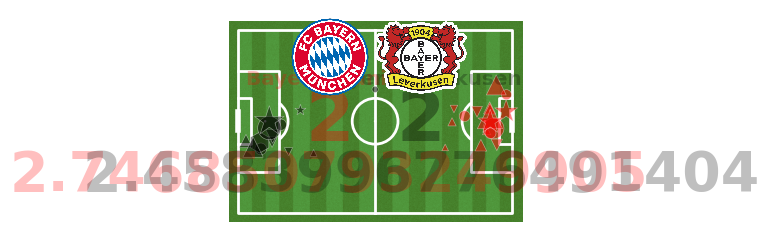

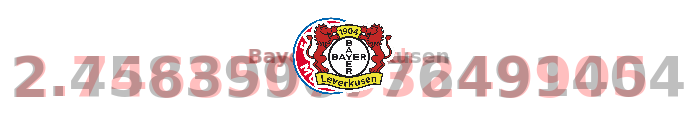

In [7]:
shotdata.static_shotmap(color1='red', color2='black', home_image ='images/bay.png', away_image='images/bay04.png')

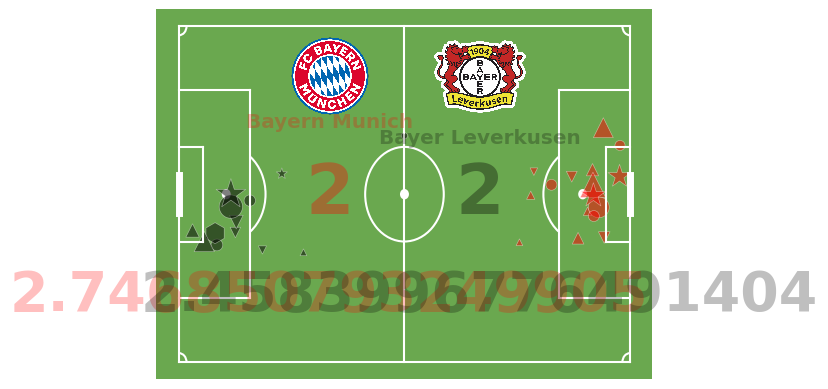

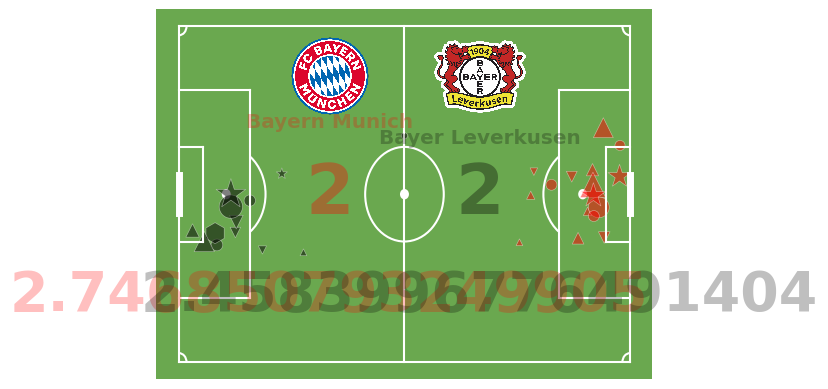

In [8]:
shotdata_reinitialized = shot_data(shotdata.org_data, scale_to_pitch='myPitch', data_source='Understat')
shotdata_reinitialized.static_shotmap(pitch_type='myPitch',  color1='red', color2='black', home_image ='images/bay.png',
                                      away_image='images/bay04.png')

 # Plotly shotmap

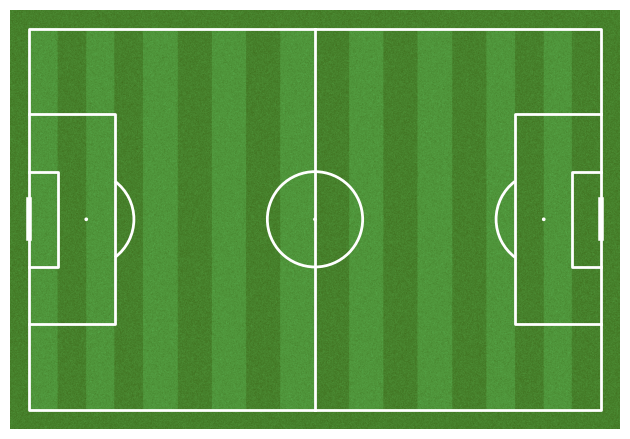

In [9]:
figure = shotdata.interactive_shotmap(home_image='images/bay.png', away_image='images/bay04.png', color2='black')

In [10]:
figure

In [11]:
shotdata2= shot_data(shotdata.org_data, scale_to_pitch='myPitch', data_source='Understat')
shotdata2.data

x          y        xG  minute              team  \
0   102.690003  41.925000  0.061222       1     Bayern Munich   
1    92.925000  23.985001  0.089346       2     Bayern Munich   
2   102.584997  35.945000  0.448874       6     Bayern Munich   
3    86.729998  34.320000  0.074437      10     Bayern Munich   
4    95.129998  29.185001  0.035626      34     Bayern Munich   
5    99.015003  24.114999  0.087362      34     Bayern Munich   
6    81.900000  32.305000  0.033529      42     Bayern Munich   
7    91.454998  35.880000  0.072835      42     Bayern Munich   
8    96.284997  37.245000  0.100616      43     Bayern Munich   
9    98.804998  45.370002  0.298206      44     Bayern Munich   
10   82.634997  36.855000  0.025044      45     Bayern Munich   
11   97.754998  29.964999  0.329252      45     Bayern Munich   
12   79.275000  23.205000  0.014844      51     Bayern Munich   
13   96.390003  34.320000  0.491690      56     Bayern Munich   
14   96.600000  28.275000  0.075253      65     Bayern Munich   
15   96.495002  32.239999  0.508713      85     Bayern Munich   
16   13.125000  25.089999  0.067680      22  Bayer Leverkusen   
17   23.940003  36.464999  0.086198      23  Bayer Leverkusen   
18    3.150000  25.480000  0.122304      30  Bayer Leverkusen   
19   28.979998  21.254998  0.015840      31  Bayer Leverkusen   
20    8.820002  22.685001  0.090352      31  Bayer Leverkusen   
21   13.334997  27.105000  0.128769      39  Bayer Leverkusen   
22   52.500000  43.810001  0.009916      50  Bayer Leverkusen   
23    8.400000  24.960001  0.336147      77  Bayer Leverkusen   
24    5.879998  23.335001  0.310085      79  Bayer Leverkusen   
25   19.425000  21.710001  0.032324      80  Bayer Leverkusen   
26   16.484997  31.264999  0.082730      84  Bayer Leverkusen   
27   12.075000  30.095000  0.418277      87  Bayer Leverkusen   
28   12.075000  32.500000  0.757777      93  Bayer Leverkusen   

                      player       result  
0               Serge Gnabry  MissedShots  
1              Konrad Laimer    SavedShot  
2                 Harry Kane         Goal  
3                 Leroy Sané  MissedShots  
4              Thomas Müller    SavedShot  
5               Serge Gnabry  BlockedShot  
6                 Leroy Sané    SavedShot  
7                Kim Min-Jae  BlockedShot  
8              Leon Goretzka    SavedShot  
9               Serge Gnabry    SavedShot  
10             Konrad Laimer  BlockedShot  
11              Serge Gnabry  MissedShots  
12            Joshua Kimmich    SavedShot  
13                Harry Kane    SavedShot  
14  Dayotchanculle Upamecano  MissedShots  
15             Leon Goretzka         Goal  
16           Victor Boniface  BlockedShot  
17             Álex Grimaldo         Goal  
18           Victor Boniface    SavedShot  
19              Granit Xhaka    SavedShot  
20           Victor Boniface  MissedShots  
21           Victor Boniface  BlockedShot  
22           Victor Boniface  MissedShots  
23             Florian Wirtz   ShotOnPost  
24           Victor Boniface    SavedShot  
25             Álex Grimaldo  BlockedShot  
26           Victor Boniface  MissedShots  
27           Victor Boniface  MissedShots  
28         Exequiel Palacios         Goal

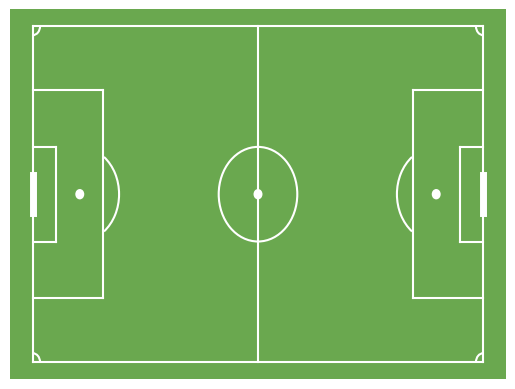

In [12]:
figure = shotdata2.interactive_shotmap(pitch_type='myPitch', home_image='images/bay.png', away_image='images/bay04.png', color2='black')

In [13]:
figure

In [14]:
from Data.Statsbomb_Data import match_events

sd, teams = match_events(match_id=3857261, event_filter='shots')

None


In [15]:
sd

id  index  period     timestamp  minute  \
0   0e6af047-9158-446b-9e7d-f6e6a95f1de3    438       1  00:09:11.146       9   
1   ffca546a-2663-4aae-a08f-d869a175e95d    644       1  00:14:03.641      14   
2   1b5ab9c1-d01f-418e-a21b-1e019c5499d0    732       1  00:17:59.934      17   
3   34ab7bc7-d3f3-4014-9c25-c8c3e8e89167    901       1  00:23:03.713      23   
4   039e4f78-c99d-4103-b9cc-1b83eca35b7c   1318       1  00:37:12.383      37   
5   2e58b4a3-6c6c-4d0a-8b9d-ce7fa6304bb7   1344       1  00:38:12.492      38   
6   7bf9a451-41dd-454d-9be7-4a9ab9d09b92   1373       1  00:38:38.910      38   
7   a1906bad-dec0-460b-b80f-34c540ebe759   1548       1  00:43:51.135      43   
8   068c719d-a8b5-4897-998a-a21090d984b0   1702       1  00:47:16.169      47   
9   c576a23b-c51c-4c7f-ab7f-d299a11d55ed   1708       1  00:47:55.540      47   
10  2cedf7d4-d1e0-4024-b456-bea56e278224   1729       1  00:49:36.290      49   
11  bfae2fa6-7501-416c-b2d0-fdbeab3b331a   1900       2  00:04:17.488      49   
12  2250e1fb-d6fa-479f-b60f-1051b6f1d9dc   1929       2  00:05:53.871      50   
13  281f572c-821f-4530-8909-e8312af20899   2063       2  00:10:07.885      55   
14  97f496c6-1c58-4d37-ab5d-0f182377932a   2373       2  00:22:40.407      67   
15  09707c2b-a561-40e4-90b2-552936c8e931   2518       2  00:26:21.631      71   
16  8eb52d09-57e0-408f-9861-78e85ea1b741   2544       2  00:27:29.220      72   
17  509f7607-ca7b-4ceb-9a8b-d99de5889de2   2699       2  00:31:38.542      76   
18  88f81ce7-4f40-4ce0-a1b4-03841785f572   2702       2  00:31:40.568      76   
19  df0c2bea-39aa-4383-a173-6f39a96af140   2705       2  00:31:41.514      76   
20  0ebd8395-3cf7-402a-ac6b-032221297853   2887       2  00:37:59.545      82   
21  1de59a3e-a443-4904-9a0c-89ac41bb1e8b   2921       2  00:38:41.019      83   
22  c7b3c21d-9e04-44b6-9d36-dabcb3231728   3066       2  00:41:15.054      86   
23  63b80dc5-25fe-4e1e-8783-c5cd4c27248f   3198       2  00:45:53.744      90   
24  4f2b3941-7a5b-47c7-80cc-10fc7c13d90e   3300       2  00:48:25.378      93   

    second  type  possession possession_team    play_pattern  ...  \
0       11  Shot          20         England   From Throw In  ...   
1        3  Shot          27         England  From Free Kick  ...   
2       59  Shot          31         England  From Free Kick  ...   
3        3  Shot          37         England  From Free Kick  ...   
4       12  Shot          61         England    Regular Play  ...   
5       12  Shot          62           Wales  From Goal Kick  ...   
6       38  Shot          63         England    Regular Play  ...   
7       51  Shot          72         England  From Free Kick  ...   
8       16  Shot          80         England    Regular Play  ...   
9       55  Shot          81         England     From Corner  ...   
10      36  Shot          86           Wales   From Throw In  ...   
11      17  Shot          93         England  From Free Kick  ...   
12      53  Shot          95         England    Regular Play  ...   
13       7  Shot         102           Wales    From Counter  ...   
14      40  Shot         119         England   From Throw In  ...   
15      21  Shot         124         England    Regular Play  ...   
16      29  Shot         126           Wales     From Keeper  ...   
17      38  Shot         134         England    From Counter  ...   
18      40  Shot         134         England    From Counter  ...   
19      41  Shot         134         England    From Counter  ...   
20      59  Shot         142           Wales  From Free Kick  ...   
21      41  Shot         143           Wales   From Throw In  ...   
22      15  Shot         147           Wales    Regular Play  ...   
23      53  Shot         153         England     From Corner  ...   
24      25  Shot         156         England  From Free Kick  ...   

         location  duration  \
0   [104.0, 39.5]  0.135614   
1    [97.4, 54.6]  1.015402   
2   [120.0, 54.6]  0.589440   
3    [98.2, 

In [16]:
shotdata = shot_data(sd, data_source='Statsbomb')
print(shotdata)

shot_data object of Statsbomb of shape (25, 7).


In [17]:
shotdata.data

player  minute     team   result      x     y  \
0                   Marcus Rashford       9  England    Saved  104.0  39.5   
1                      Philip Foden      14  England    Off T   97.4  54.6   
2                     Harry Maguire      17  England    Off T  120.0  54.6   
3                   Marcus Rashford      23  England  Blocked   98.2  19.5   
4                      Philip Foden      37  England    Off T  105.5  47.4   
5                         Joe Allen      38    Wales  Blocked   25.9  33.0   
6                   Marcus Rashford      38  England    Off T  108.4  35.0   
7                        Harry Kane      43  England  Blocked  101.5  35.7   
8                        Harry Kane      47  England  Blocked  101.2  27.6   
9                       John Stones      47  England    Saved  112.8  55.4   
10                        Joe Allen      49    Wales    Off T   19.3  28.7   
11                  Marcus Rashford      49  England     Goal   96.1  29.3   
12                     Philip Foden      50  England     Goal  114.5  34.1   
13  Kieffer Roberto Francisco Moore      55    Wales    Saved   29.9  57.7   
14                  Marcus Rashford      67  England     Goal  109.9  50.3   
15                  Marcus Rashford      71  England    Saved  110.3  52.4   
16                  Brennan Johnson      72    Wales  Blocked   15.5  22.7   
17                  Jude Bellingham      76  England    Saved  104.3  32.8   
18                  Jude Bellingham      76  England  Wayward  112.7  29.3   
19                     Philip Foden      76  England    Off T  116.1  39.5   
20                     Harry Wilson      82    Wales  Blocked   27.4  27.4   
21                    Rubin Colwill      83    Wales    Off T   21.7  53.9   
22  Kieffer Roberto Francisco Moore      86    Wales    Off T   17.9  45.4   
23                      John Stones      90  England     Post  114.4  43.9   
24                     Philip Foden      93  England  Blocked  111.0  48.5   

          xG  
0   0.284411  
1   0.023544  
2   0.010841  
3   0.010357  
4   0.057255  
5   0.022616  
6   0.081256  
7   0.028181  
8   0.030066  
9   0.006451  
10  0.041093  
11  0.057808  
12  0.440301  
13  0.007536  
14  0.096603  
15  0.131843  
16  0.021923  
17  0.250308  
18  0.243624  
19  0.610025  
20  0.031329  
21  0.025067  
22  0.058446  
23  0.455076  
24  0.097535

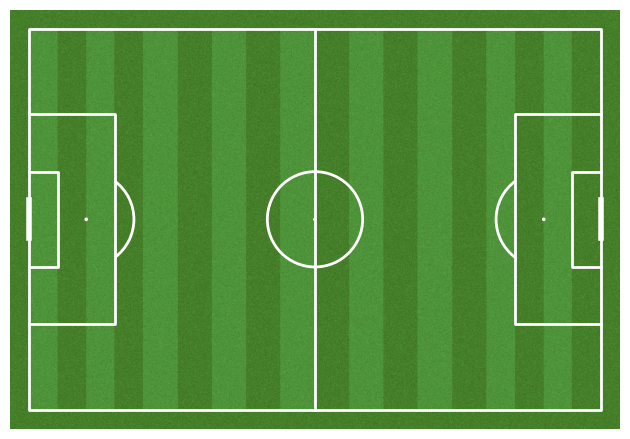

In [18]:
figure = shotdata.interactive_shotmap(color2='black')

In [19]:
figure

In [20]:
shotdata = shot_data(sd, data_source='Statsbomb', scale_to_pitch='myPitch')
print(shotdata)

shot_data object of Statsbomb of shape (25, 7).


In [21]:
shotdata.data

player  minute     team   result         x  \
0                   Marcus Rashford       9  England    Saved   91.0000   
1                      Philip Foden      14  England    Off T   85.2250   
2                     Harry Maguire      17  England    Off T  105.0000   
3                   Marcus Rashford      23  England  Blocked   85.9250   
4                      Philip Foden      37  England    Off T   92.3125   
5                         Joe Allen      38    Wales  Blocked   22.6625   
6                   Marcus Rashford      38  England    Off T   94.8500   
7                        Harry Kane      43  England  Blocked   88.8125   
8                        Harry Kane      47  England  Blocked   88.5500   
9                       John Stones      47  England    Saved   98.7000   
10                        Joe Allen      49    Wales    Off T   16.8875   
11                  Marcus Rashford      49  England     Goal   84.0875   
12                     Philip Foden      50  England     Goal  100.1875   
13  Kieffer Roberto Francisco Moore      55    Wales    Saved   26.1625   
14                  Marcus Rashford      67  England     Goal   96.1625   
15                  Marcus Rashford      71  England    Saved   96.5125   
16                  Brennan Johnson      72    Wales  Blocked   13.5625   
17                  Jude Bellingham      76  England    Saved   91.2625   
18                  Jude Bellingham      76  England  Wayward   98.6125   
19                     Philip Foden      76  England    Off T  101.5875   
20                     Harry Wilson      82    Wales  Blocked   23.9750   
21                    Rubin Colwill      83    Wales    Off T   18.9875   
22  Kieffer Roberto Francisco Moore      86    Wales    Off T   15.6625   
23                      John Stones      90  England     Post  100.1000   
24                     Philip Foden      93  England  Blocked   97.1250   

           y        xG  
0   32.90625  0.284411  
1   20.63750  0.023544  
2   20.63750  0.010841  
3   49.15625  0.010357  
4   26.48750  0.057255  
5   38.18750  0.022616  
6   36.56250  0.081256  
7   35.99375  0.028181  
8   42.57500  0.030066  
9   19.98750  0.006451  
10  41.68125  0.041093  
11  41.19375  0.057808  
12  37.29375  0.440301  
13  18.11875  0.007536  
14  24.13125  0.096603  
15  22.42500  0.131843  
16  46.55625  0.021923  
17  38.35000  0.250308  
18  41.19375  0.243624  
19  32.90625  0.610025  
20  42.73750  0.031329  
21  21.20625  0.025067  
22  28.11250  0.058446  
23  29.33125  0.455076  
24  25.59375  0.097535

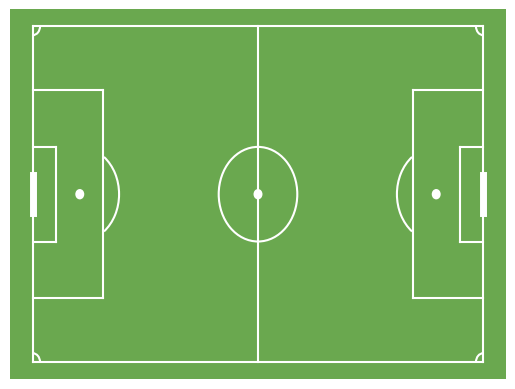

In [22]:
figure = shotdata.interactive_shotmap(pitch_type='myPitch', color2='black')

In [23]:
figure